<a href="https://colab.research.google.com/github/riddhipatel09/AI/blob/main/Perceptron-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1148919702.py:74: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_df.fillna(X_df.median().infer_objects(copy=False), inplace=True) # Addressed FutureWarning


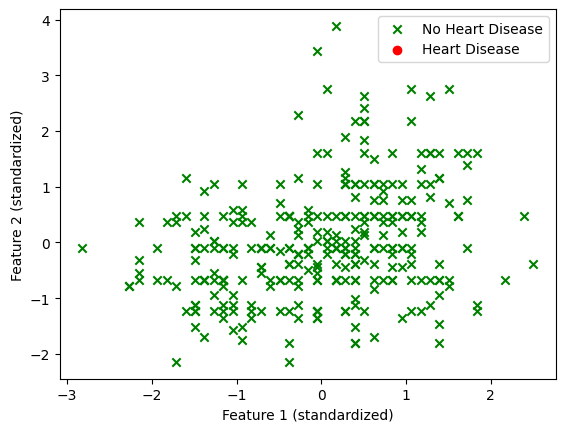

Training Accuracy: 100.00%


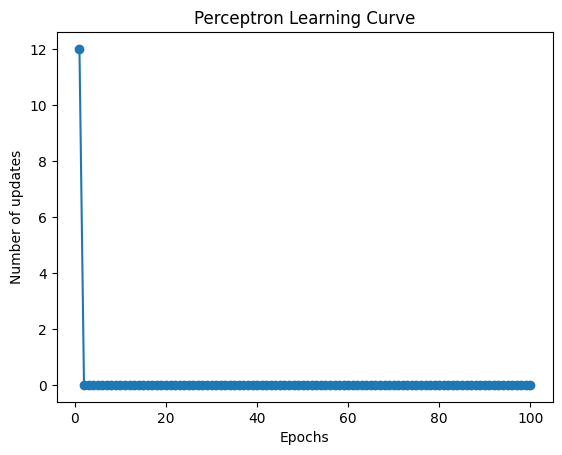

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# -------------------------
# Perceptron class definition
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(x))
                self.weights[1:] += update * x
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

# -------------------------
# Load Cleveland Heart Disease dataset from OpenML
try:
    heart = fetch_openml(name='Cleveland', version=1, as_frame='auto')
    df = heart.frame
except Exception as e:
    print(f"Error loading dataset from OpenML: {e}")
    df = None # Ensure df is None if loading fails

if df is not None:
    # -------------------------
    # Preprocess data
    # Convert target to binary: 1 = Heart Disease, -1 = No Heart Disease
    # Assuming 'target' is the target column name and it contains numerical values
    # Adjusting target conversion based on the dataset's actual target values if needed
    # For example, if target values are 0, 1, 2, 3, 4 where > 0 indicates heart disease:

    # Access target column by index as a workaround for KeyError
    # Assuming 'target' is the last column (index 13) based on df output
    y = df.iloc[:, -1].apply(lambda x: 1 if x in ['cleveland-va'] else -1).values

    # Select all columns except the last one as features
    X = df.iloc[:, :-1].values


    # Convert categorical columns to numeric if needed (excluding the target column if it was categorical)
    # Identify categorical columns (excluding the target which is now handled by index)
    categorical_cols = df.iloc[:, :-1].select_dtypes(include=['category']).columns.tolist()

    # Re-create DataFrame X with categorical columns for get_dummies
    X_df = pd.DataFrame(X, columns=df.columns[:-1])
    X_df = pd.get_dummies(X_df, columns=categorical_cols, drop_first=True)
    X = X_df.values # Update X to the new numpy array


    # Handle missing values by replacing them with the median of each column
    # Apply fillna to the processed X DataFrame before converting back to numpy
    X_df.fillna(X_df.median().infer_objects(copy=False), inplace=True) # Addressed FutureWarning
    X = X_df.values # Update X again


    # Standardize features for Perceptron
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # -------------------------
    # Split data for visualization (just two features for 2D plot)
    # Ensure X has at least two columns before slicing
    if X.shape[1] >= 2:
        X_vis = X[:, :2]  # pick first two features
        y_vis = y

        # Plot the dataset (two features)
        %matplotlib inline
        plt.scatter(X_vis[y_vis == -1, 0], X_vis[y_vis == -1, 1],
                    color='green', marker='x', label='No Heart Disease')
        plt.scatter(X_vis[y_vis == 1, 0], X_vis[y_vis == 1, 1],
                    color='red', marker='o', label='Heart Disease')
        plt.xlabel('Feature 1 (standardized)')
        plt.ylabel('Feature 2 (standardized)')
        plt.legend(loc='upper right')
        plt.show()
    else:
        print("Not enough features to create a 2D visualization.")


    # -------------------------
    # Train Perceptron
    per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
    per.fit(X, y)

    # -------------------------
    # Evaluate the model
    train_accuracy = np.mean(per.predict(X) == y) # Evaluate on full dataset as no test split done yet
    # train_accuracy = np.mean(per.predict(X_train) == y_train) # Use these lines if you add train/test split back
    # test_accuracy = np.mean(per.predict(X_test) == y_test)


    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    # print(f"Testing Accuracy: {test_accuracy * 100:.2f}%") # Use this line if you add train/test split back


    # -------------------------
    # Plot learning curve (misclassifications per epo
    plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of updates')
    plt.title('Perceptron Learning Curve')
    plt.show()
else:
    print("DataFrame not loaded. Cannot proceed with preprocessing and training.")